# <span style="color:#4d4dff"> Projeto Titanic: Uma análise dos dados de passageiros </span>

Dados extraídos de https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59e4fe3d_titanic-data-6/titanic-data-6.csv
<p>Maiores informações em https://www.kaggle.com/c/titanic/data</p>

<p style="color:#4d4dff"> Neste trabalho tentaremos responder as seguintes questões: </p>
<ul style="color:#4d4dff">
    <li>Quantas mulheres e homens estavam a bordo do navio.</li>
    <li>Qual foi a mortalidade em cada sexo.</li>
    <li>Qual era a faixa etária da tripulação</li>
    <li>Qual foi a mortalidade por classe.</li>
    <li>Qual o total de passageiros por local de embarque.</li>
    <li>Qual foi a mortandade por local de embarque</li>
    
        
</ul>

In [2]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('titanic-data-6.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<span style="color:#4d4dff">Primeiro vamos verificar os dados na tabela.</span>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<span style="color:#4d4dff"> Verificamos que os tipos de dados estão apropriados em quase todas as colunas (com exceção para 'Survived' que trataremos mais adiante) mas existem valores faltantes. Para "Age" aplicaremos à todos valores faltantes a média das idades. </span>
                

In [5]:
mean = df["Age"].mean()
df["Age"].fillna(mean, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<span style="color:#4d4dff">Observamos agora de forma mais precisa que existem muitos valores faltantes para 'Cabin' e apenas 2 para 'Embarked'. Para a nossa análise, 'Cabin' será removido da tabela (qualquer análise que levasse a cabine em consideração seria muito imprecisa)  e verificaremos  a contagem dos valores para 'Embarked' e tomarmos uma decisão. </span>

In [7]:
df = df.drop('Cabin', axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<span style="color:#4d4dff">Como 'Southampton' é o valor mais frequente (bem mais frequente do que o segundo lugar) aplicaremos  o valor de 'S' para as duas linhas faltantes por ser o valor mais provável.</span>

In [9]:
df["Embarked"].fillna('S', inplace = True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<span style="color:#4d4dff">Nenhum valor faltante</span>

In [10]:
sum(df.duplicated()) 

0

<span style="color:#4d4dff">Também não existem valores duplicados.</span>

<span style="color:#4d4dff">Para efeitos de melhor vizualização, mudaremos o tipo da coluna 'Survived' para String e seus valores para 'Yes' e 'No'  ao invés de '0' e '1'. Também mudaremos as siglas na coluna 'Embarked' para o nome do local.</span>

In [11]:
df['Survived'] = df.Survived.astype(str)
df['Survived'] = df['Survived'].map({'0': 'No', '1':'Yes'})
df['Embarked'] = df['Embarked'].map({'S': 'Southampton', 'C':'Cherbourg', 'Q':'Queenstown'})
#não rodar de novo, ou as linhas serão substituidas por Nan
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton


<span style="color:#4d4dff">Questão: Primeiro queremos saber quantas mulheres e homens estavam a bordo do navio. </span>


Sex
female    314
male      577
dtype: int64

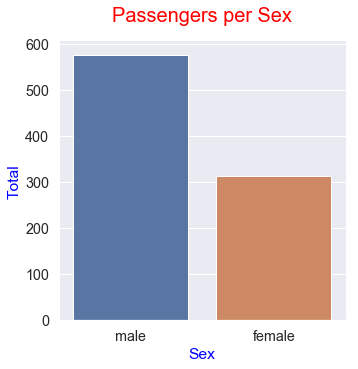

In [21]:
sns.catplot('Sex', data=df, kind='count')
sns.set(font_scale = 1.3)

def std_title_labels(title, labelx, labely):
    plt.title(title, loc = 'center',fontsize = 20, color= 'Red', y = 1.05)
    plt.xlabel(labelx, color= 'blue')
    plt.ylabel(labely, color = 'blue')
    
std_title_labels('Passengers per Sex', 'Sex', 'Total')
    

df.groupby(['Sex']).size()


<span style="color:#4d4dff">Em seguida apresentaremos um gráfico sobre a mortandade em cada sexo.</span>

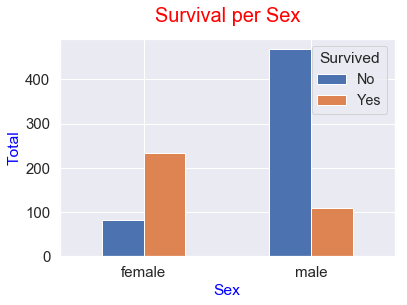

In [13]:
df.groupby(['Sex', 'Survived']).size().unstack().plot.bar(fontsize=15, rot=0)
std_title_labels('Survival per Sex', 'Sex', 'Total')



<span style="color:#4d4dff">Observamos que temos 577 homens e 314 mulheres registrados na tabela. E que mais homens morreram do que mulheres.</span>

<span style="color:#4d4dff">Agora queremos saber a faixa etária dos tripulantes. Para isso estabeleceremos alguns critérios para agrupá-los por idade.</span>

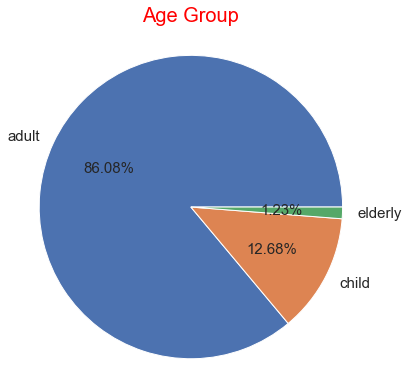

In [14]:
def faixa_etaria(linha):
    '''
    Verifica o valor na coluna 'Age' e retorna uma string de acordo com a faixa de idade.

    Parameters:
    linha -- cada linha do data frame.

    Returns:
    string de acordo com a faixa etária: 'child' se < 18 // 'elderly' se >= 65 // 'adult' para qualquer outro valor
    
    '''     

    if linha.Age < 18:
        return 'child'
    elif linha.Age >= 65:
        return 'elderly'
    else: 
        return 'adult'

df['Faixa_Idade'] = df.apply(faixa_etaria, axis=1)
df.Faixa_Idade.value_counts().plot(kind='pie', autopct='%.2f%%',fontsize=15,figsize = (6,6))
plt.axis('equal')
std_title_labels('Age Group', '', '')

<span style="color:#4d4dff">Apresentaremos agora a mortandade por faixa etária</span>

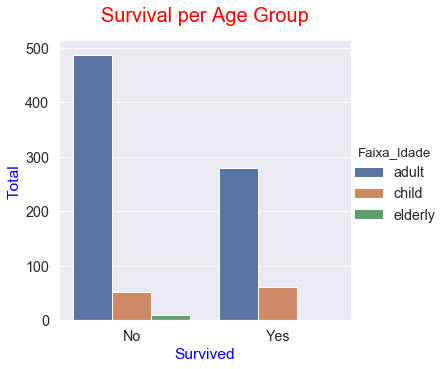

In [15]:
sns.catplot('Survived', data=df, hue='Faixa_Idade', kind='count')
std_title_labels('Survival per Age Group', 'Survived', 'Total')


<span style="color:#4d4dff">Questão: Queremos saber agora a proporção entre mortandade e classe do passageiro.</span>

Pclass
1    216
2    184
3    491
dtype: int64

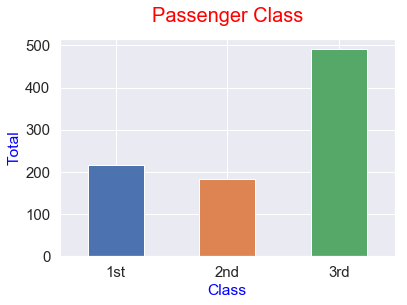

In [16]:
df.groupby(['Pclass']).size().plot.bar(fontsize=15, rot=0)
std_title_labels('Passenger Class', 'Class', 'Total')
plt.xticks(np.arange(3), ('1st', '2nd', '3rd'))
df.groupby(['Pclass']).size()

<span style="color:#4d4dff">Obtivemos um gráfico sobre a quantidade de passageiro por classe no navio. </span>
    
<span style="color:#4d4dff">Questão: Queremos agora avaliar a mortalidade por classe.</span>

([<matplotlib.axis.XTick at 0x1ba54053b00>,
 <a list of 3 Text xticklabel objects>)

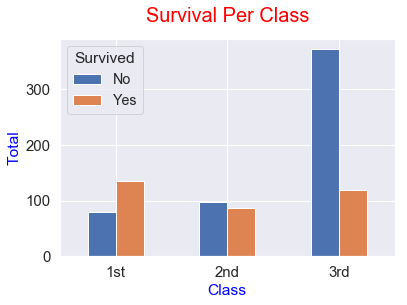

In [17]:
df.groupby(['Pclass', 'Survived']).size().unstack().plot.bar(fontsize=15, rot=0)
std_title_labels('Survival Per Class', 'Class', 'Total')
plt.xticks(np.arange(3), ('1st', '2nd', '3rd'))


<span style="color:#4d4dff"> Questão: Queremos visualizar de onde vinham os passageiros e qual origem teve a maior mortalidade.</span>

<span style="color:#4d4dff"> Primeiro queremos vizualizar o total de passageiros por local de embarque.</span>

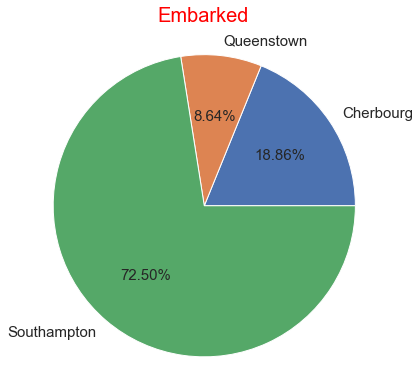

In [18]:
df.groupby(['Embarked']).size().plot.pie(fontsize=15,figsize = (6,6), autopct='%.2f%%')
plt.axis('equal')
std_title_labels('Embarked', '', '')

<span style="color:#4d4dff">Agora queremos um gráfico com a mortalidade para cada local de embarque.</span>

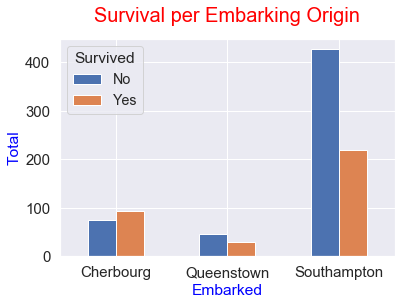

In [19]:
df.groupby(['Embarked','Survived']).size().unstack().plot(kind = 'bar', fontsize=15, rot=0)
std_title_labels('Survival per Embarking Origin', 'Embarked', 'Total')


# <span style="color:#4d4dff"> Conclusões:</span>


* Haviam mais homens do que mulheres no navio (577 homens e 314 mulheres). Entre os dois grupos, os homens tiveram, ainda que mantidas as devidas proporções, uma mortandade muito maior. Provavelmente devido ä politica "mulheres e crianças primeiro".
* Observamos que o índice de mortalidade na terceira classe é o mais alto. E que mesmo sendo o grupo predominante no navio, com larga vantagem para os outros dois, mesmo assim seu índice de sobrevivência foi baixo se comparado às outras classes. Observamos também que a primeira classe teve mais sobreviventes do que mortos. Alguns fatores podem ter contribuido para isso. Desde arbitrariedade por parte da tripulacão ao selecionar passageiros para entrarem nos botes, ou proximidade das cabines de primeira classe com os botes salva vidas, ou ambos.
* A grande maioria dos tripulantes era oriunda de Southampton, que teve também a maior mortandade. Percebemos também que o gráfico de sobrevivência por local de embarque é bastante semelhante ao gráfico de sobrevivência por classe. 
    
# <span style="color:#4d4dff">Limitações:</span>  
   <p> Um fator a ser considerado é de que os dados aqui apresentados não representam a realidade exata dos passageiros do Titanic, uma vez que existiam aproximandamente 1300 passageiros além da tripulação. Aqui trabalhamos com dados de 891 pessoas. O trabalho apresentado no gráfico 'Faixa Etária' é claramente o mais impreciso, uma vez que muitos valores faltantes foram transformados na média das idades conforme introduzido na etapa de data wrangling. A coluna 'Cabin' apesar de ter muitos valores faltantes, por não ter sido utilizada na análise, optou-se por não alterá-la. Dois valores ausentes na coluna 'Embarked' foram preenchidos com 'Southampton' por ser o valor mais provável. Passageiros oriundos do local representam mais do que o dobro do segundo lugar.</p> 
   
  
